In [1]:
%matplotlib inline


# Print Graph


Example subclass of the Graph class.


Add node: foo
Add node: b
Add node: a
Add node: r
Remove node: b
Remove node: a
Remove node: r
Nodes in G:  [('foo', {'attr_dict': None})]
Add edge: 0-1
Edges in G:  [(0, 1, {'attr_dict': None, 'weight': 10})]
Remove edge: 0-1
Add edge: 0-1
Add edge: 1-2
Add edge: 2-3
Edges in G:  [(0, 1, {'attr_dict': None, 'weight': 10}), (1, 2, {'attr_dict': None, 'weight': 10}), (2, 3, {'attr_dict': None, 'weight': 10})]
Remove edge: 0-1
Remove edge: 1-2
Remove edge: 2-3
Edges in G:  []
Add node: 0
Add edge: 0-1
Add edge: 1-2
Add edge: 2-3
Add edge: 3-4
Add edge: 4-5
Add edge: 5-6
Add edge: 6-7
Add edge: 7-8
Add edge: 8-9
Add node: 9
Add edge: 9-10
Add edge: 9-11
Add edge: 9-12


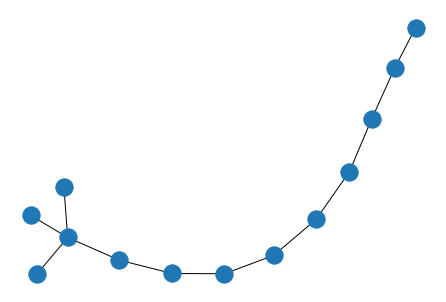

In [2]:
# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2004-2019 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.
#
__docformat__ = "restructuredtext en"

from copy import deepcopy

import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph

class PrintGraph(Graph):
    """
    Example subclass of the Graph class.

    Prints activity log to file or standard output.
    """

    def __init__(self, data=None, name='', file=None, **attr):
        Graph.__init__(self, data=data, name=name, **attr)
        if file is None:
            import sys
            self.fh = sys.stdout
        else:
            self.fh = open(file, 'w')

    def add_node(self, n, attr_dict=None, **attr):
        Graph.add_node(self, n, attr_dict=attr_dict, **attr)
        self.fh.write("Add node: %s\n" % n)

    def add_nodes_from(self, nodes, **attr):
        for n in nodes:
            self.add_node(n, **attr)

    def remove_node(self, n):
        Graph.remove_node(self, n)
        self.fh.write("Remove node: %s\n" % n)

    def remove_nodes_from(self, nodes):
        for n in nodes:
            self.remove_node(n)

    def add_edge(self, u, v, attr_dict=None, **attr):
        Graph.add_edge(self, u, v, attr_dict=attr_dict, **attr)
        self.fh.write("Add edge: %s-%s\n" % (u, v))

    def add_edges_from(self, ebunch, attr_dict=None, **attr):
        for e in ebunch:
            u, v = e[0:2]
            self.add_edge(u, v, attr_dict=attr_dict, **attr)

    def remove_edge(self, u, v):
        Graph.remove_edge(self, u, v)
        self.fh.write("Remove edge: %s-%s\n" % (u, v))

    def remove_edges_from(self, ebunch):
        for e in ebunch:
            u, v = e[0:2]
            self.remove_edge(u, v)

    def clear(self):
        Graph.clear(self)
        self.fh.write("Clear graph\n")


if __name__ == '__main__':
    G = PrintGraph()
    G.add_node('foo')
    G.add_nodes_from('bar', weight=8)
    G.remove_node('b')
    G.remove_nodes_from('ar')
    print("Nodes in G: ", G.nodes(data=True))
    G.add_edge(0, 1, weight=10)
    print("Edges in G: ", G.edges(data=True))
    G.remove_edge(0, 1)
    G.add_edges_from(zip(range(0, 3), range(1, 4)), weight=10)
    print("Edges in G: ", G.edges(data=True))
    G.remove_edges_from(zip(range(0, 3), range(1, 4)))
    print("Edges in G: ", G.edges(data=True))

    G = PrintGraph()
    nx.add_path(G, range(10))
    nx.add_star(G, range(9, 13))
    nx.draw(G)
    plt.show()